In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx


In [6]:
# Improve plot resolution
plt.rcParams["figure.dpi"] = 150


In [8]:
df = pd.read_csv("BIDM_dataset.csv")  # change filename if needed

# Keep only numeric columns (pollutants, weather, AQI)
num_df = df.select_dtypes(include='number')

In [30]:
# Visual Python: Data Analysis > Frame
#num_df.drop(['Unnamed: 0'], axis=1, inplace=True)
num_df.head()

,aqi,co,no,no2,o3,so2,pm2_5,pm10,nh3,temp_avg,humidity,pressure,wind_speed,cloud_cover,precipitation_mm
0,5.0,1186.055000,7.598333,20.305000,8.616667,7.628333,137.000000,157.860000,6.428333,9.747167,90.378387,1021.866699,5.138171,3.500000,0.0
1,5.0,983.556667,2.873333,14.743333,136.256667,18.536667,115.993333,128.063333,7.420000,18.038832,56.834469,1020.250000,3.774612,0.000000,0.0
2,5.0,1740.136667,0.100000,63.633333,44.703333,26.621667,174.200000,202.561667,30.651667,13.288834,78.100014,1020.950012,6.491616,0.000000,0.0
3,5.0,1584.368333,0.603333,43.181667,10.470000,7.848333,197.413333,224.560000,7.810000,9.347167,92.054596,1020.266663,7.481165,0.000000,0.0
4,5.0,2116.205000,21.005000,29.586667,3.893333,16.571667,286.403333,311.601667,9.818333,10.030500,93.110924,1022.533386,3.871456,59.166668,0.0


In [32]:
corr = num_df.corr()
corr.head()

,aqi,co,no,no2,o3,so2,pm2_5,pm10,nh3,temp_avg,humidity,pressure,wind_speed,cloud_cover,precipitation_mm
aqi,1.000000,0.545788,0.221817,0.267439,0.266568,0.416683,0.662214,0.653132,0.458269,-0.285408,-0.218244,0.452517,-0.405039,-0.535144,-0.221447
co,0.545788,1.000000,0.771173,0.444409,-0.164782,0.633316,0.883147,0.870803,0.617470,-0.352444,0.102713,0.315390,-0.313256,-0.214393,-0.086413
no,0.221817,0.771173,1.000000,0.290757,-0.188444,0.544829,0.570586,0.573071,0.378223,-0.126925,0.089896,0.132170,-0.154908,-0.049778,-0.021379
no2,0.267439,0.444409,0.290757,1.000000,-0.092692,0.387096,0.377852,0.378598,0.304307,-0.153559,0.020234,0.152181,-0.159203,-0.111127,-0.037135
o3,0.266568,-0.164782,-0.188444,-0.092692,1.000000,0.059297,-0.004242,-0.003999,-0.068209,0.358620,-0.585199,0.016486,0.068584,-0.294524,-0.131211


In [35]:
threshold = 0.45  # minimum correlation strength to show

edges = []

for i in corr.columns:
    for j in corr.columns:
        if i != j:
            strength = corr.loc[i, j]
            if abs(strength) >= threshold:
                edges.append((i, j, strength))

# Convert to DataFrame
edge_df = pd.DataFrame(edges, columns=["Source", "Target", "Strength"])
edge_df.head()


,Source,Target,Strength
0,aqi,co,0.545788
1,aqi,pm2_5,0.662214
2,aqi,pm10,0.653132
3,aqi,nh3,0.458269
4,aqi,pressure,0.452517


In [37]:
G = nx.Graph()

# Add edges with correlation strength as weight
for index, row in edge_df.iterrows():
    G.add_edge(row["Source"], row["Target"], weight=row["Strength"])



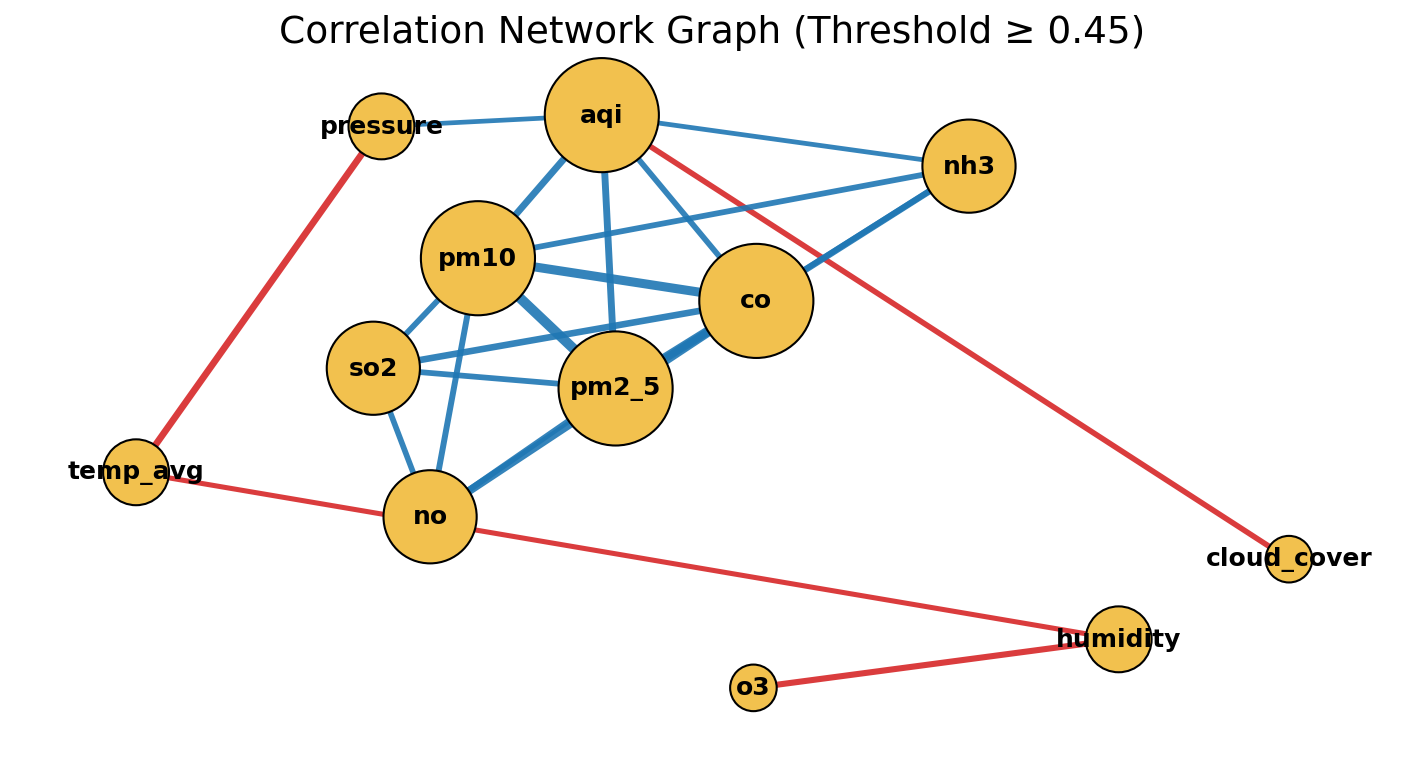

In [54]:
# Node positions (you can try: spring_layout, kamada_kawai_layout)
pos = nx.spring_layout(G, k=1.3, seed=42)

# Edge colors:
# Positive correlations = Blue
# Negative correlations = Red
edge_colors = ["#1f77b4" if G[u][v]['weight'] > 0 else "#d62728"
               for u, v in G.edges()]

# Edge thickness based on correlation strength
edge_widths = [abs(G[u][v]['weight']) * 5 for u, v in G.edges()]

# Node size based on degree (connectivity)
degrees = dict(G.degree())
node_sizes = [degrees[node] * 500 for node in G.nodes()]



# ----------------------------------------------------------
# 7. DRAW CORRELATION NETWORK GRAPH
# ----------------------------------------------------------

plt.figure(figsize=(12, 6))

# Draw nodes
nx.draw_networkx_nodes(G, pos,
                       node_size=node_sizes,
                       node_color="#f2c14e",    # gold
                       edgecolors="black")

# Draw edges
nx.draw_networkx_edges(G, pos,
                       width=edge_widths,
                       alpha=0.9,
                       edge_color=edge_colors)

# Draw labels
nx.draw_networkx_labels(G, pos,
                        font_size=12,
                        font_weight="bold")

plt.title("Correlation Network Graph (Threshold ≥ 0.45)", fontsize=18)
plt.axis("off")
plt.show()